In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000)})    # normal leptokurtic

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])
df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,59.401880,3.931979,14.552062,12.579852,21.952274
1,57.273800,13.105320,11.823116,7.101807,23.506790
2,41.312146,0.691871,12.304815,17.994195,19.403409
3,50.953487,0.122047,9.921808,13.495742,17.298632
4,41.938699,4.724358,12.505712,8.674562,21.422745


<AxesSubplot:ylabel='Density'>

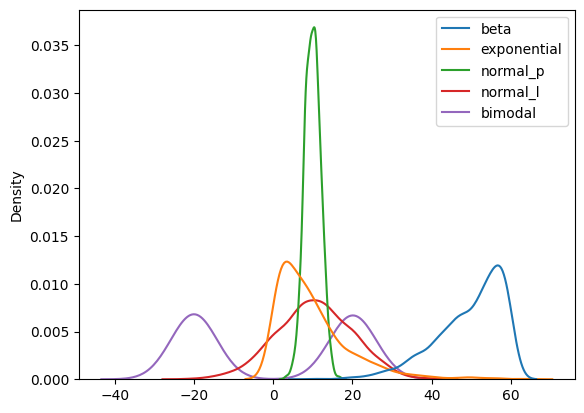

In [6]:
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.695206,9.914938,9.926774,10.401545,0.003206
std,8.515947,9.323889,2.004635,9.533696,20.307874
min,10.412874,0.001918,3.144210,-20.832354,-28.171251
25%,44.793471,2.945729,8.483507,4.135586,-20.129202
50%,51.874457,7.420885,9.936180,10.482529,-0.620772
75%,56.649991,13.573287,11.263299,16.776015,20.033179
max,59.984930,63.448964,16.788315,39.282971,28.951749


<AxesSubplot:ylabel='Density'>

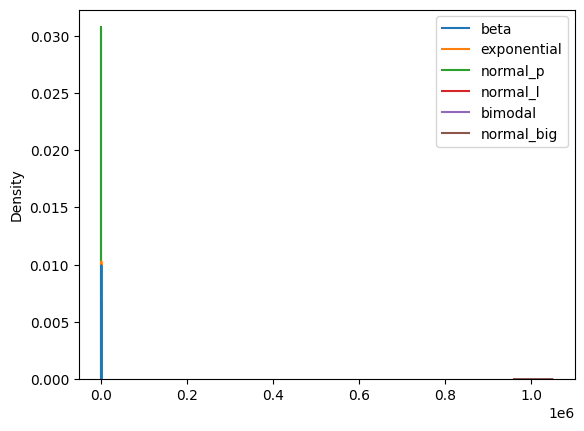

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

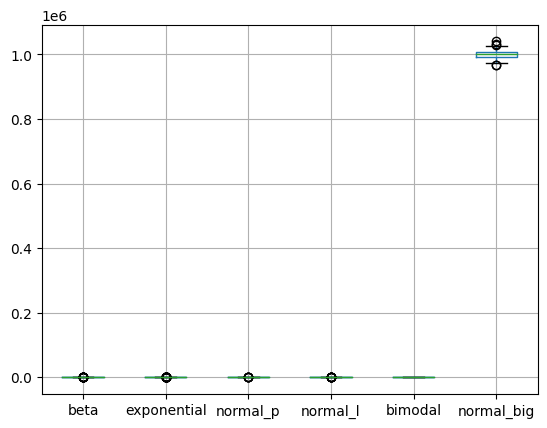

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
#Chuẩn hóa với Robust Scaling
scaler = RobustScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.634876,-0.328289,1.660513,0.165922,0.562045,0.763194
1,0.455390,0.534877,0.678805,-0.267453,0.600750,0.136768
2,-0.890844,-0.633167,0.852091,0.594257,0.498581,0.829321
3,-0.077676,-0.686784,-0.005170,0.238379,0.446174,0.067118
4,-0.837999,-0.253730,0.924361,-0.143030,0.548860,0.936179


<AxesSubplot:ylabel='Density'>

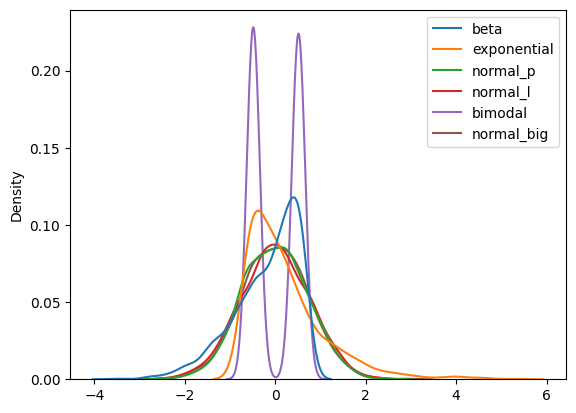

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.838019e-01,0.234678,-0.003384,-0.006407,0.015536,0.004095
std,7.182501e-01,0.877331,0.721146,0.754223,0.505644,0.735795
min,-3.496944e+00,-0.698088,-2.443338,-2.477359,-0.685977,-2.383822
25%,-5.972230e-01,-0.421090,-0.522583,-0.502115,-0.485739,-0.505834
50%,-2.996735e-16,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.027770e-01,0.578910,0.477417,0.497885,0.514261,0.494166
max,6.840517e-01,5.271962,2.464981,2.278439,0.736324,2.929938


<AxesSubplot:>

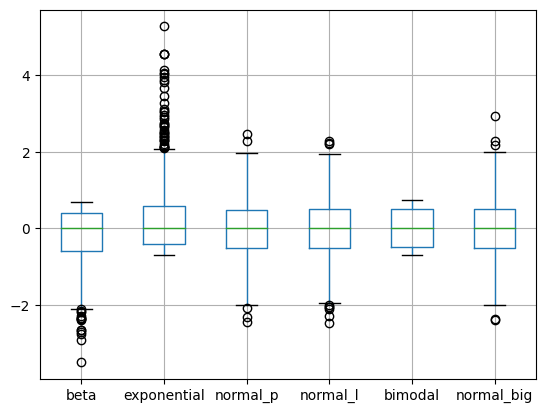

In [15]:
df_s.boxplot()

In [16]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.496943562523315,
 -0.6980877504412505,
 -2.443337508792522,
 -2.477359281873345,
 -0.6859772118510066,
 -2.3838217151307615]

In [17]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6840516507019219,
 5.271961972344019,
 2.4649808966932603,
 2.2784387156537935,
 0.7363239013035174,
 2.929937860670222]

In [18]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.18744574e+01,  7.42088531e+00,  9.93618008e+00,  1.04825288e+01,
       -6.20772178e-01,  1.00017210e+06])

In [ ]:
#Mặc dù phạm vi giá trị cho mỗi đặc trưng nhỏ hơn nhiều so với các đặc trưng gốc, nhưng nó lớn hơn và thay đổi nhiều hơn so với MinMaxScaler. Các giá trị phân phối bimodal hiện được nén thành hai nhóm nhỏ.